# Library

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data

In [28]:
data = pd.read_csv("netflix.csv")

In [29]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data cleaning

In [31]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [32]:
data.shape

(8807, 12)

In [33]:
data.drop_duplicates(inplace=True)

In [34]:
data.dropna(subset=['director','cast', 'country'], inplace=True)

In [35]:
data.shape

(5336, 12)

In [40]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [41]:
data['duration'] = data['duration'].fillna(data['duration'].mode()[0])

In [42]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [44]:
data['date_added'] = pd.to_datetime(data['date_added'].str.strip())
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [54]:
data.reset_index(drop=True, inplace=True)

In [45]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


In [46]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object

# EDA

## Content Strategy

In [48]:
type_count = data['type'].value_counts()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/2822086694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(type_count,palette='pastel')


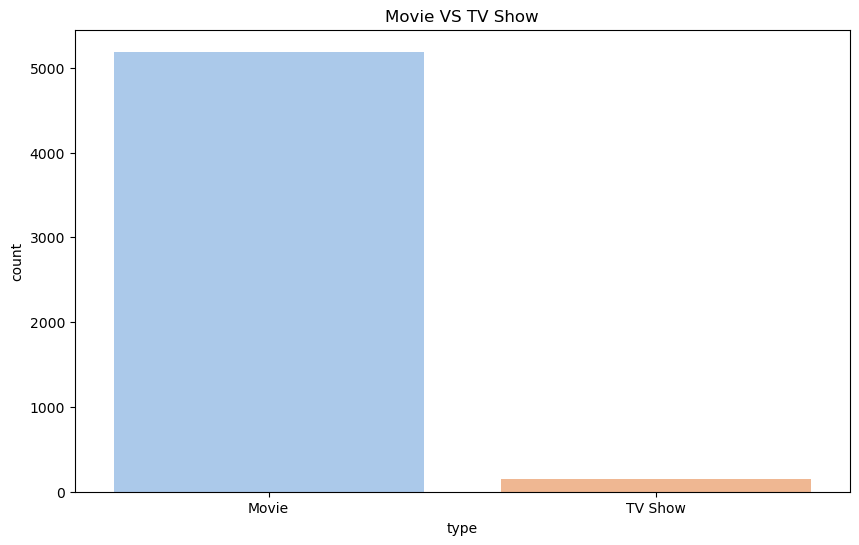

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(type_count,palette='pastel')
plt.title("Movie VS TV Show")
plt.show()

In [135]:
data['genres'] = data['listed_in'].str.split(', ')
data['genres']

0       [Dramas, Independent Movies, International Mov...
1                          [British TV Shows, Reality TV]
2                                      [Comedies, Dramas]
3                          [Dramas, International Movies]
4       [Comedies, International Movies, Romantic Movies]
                              ...                        
5331            [Dramas, International Movies, Thrillers]
5332                     [Cult Movies, Dramas, Thrillers]
5333                            [Comedies, Horror Movies]
5334                 [Children & Family Movies, Comedies]
5335     [Dramas, International Movies, Music & Musicals]
Name: genres, Length: 5336, dtype: object

In [71]:
all_genres = sum(data['genres'], [])
all_genres

['Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Dramas',
 'International Movies',
 'Comedies',
 'International Movies',
 'Romantic Movies',
 'Comedies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Action & Adventure',
 'Classic Movies',
 'Dramas',
 'Dramas',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Thrillers',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime 

In [74]:
pd.Series(all_genres).value_counts().head(10)

International Movies        2369
Dramas                      2294
Comedies                    1553
Action & Adventure           806
Independent Movies           740
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Horror Movies                336
Name: count, dtype: int64

In [76]:
top_10_genre = pd.Series(all_genres).value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/1480826799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_genre,palette='coolwarm')


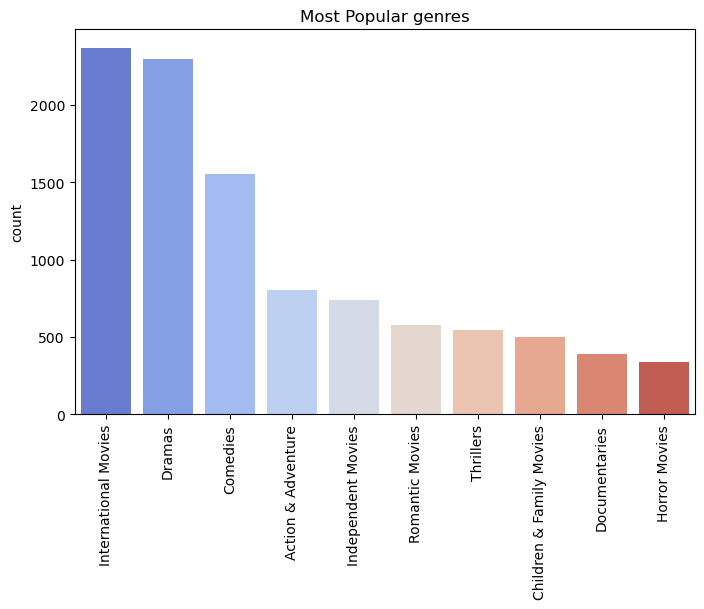

In [133]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_genre,palette='coolwarm')
plt.title("Most Popular genres")
plt.xticks(rotation=90)
plt.show()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/1572699664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


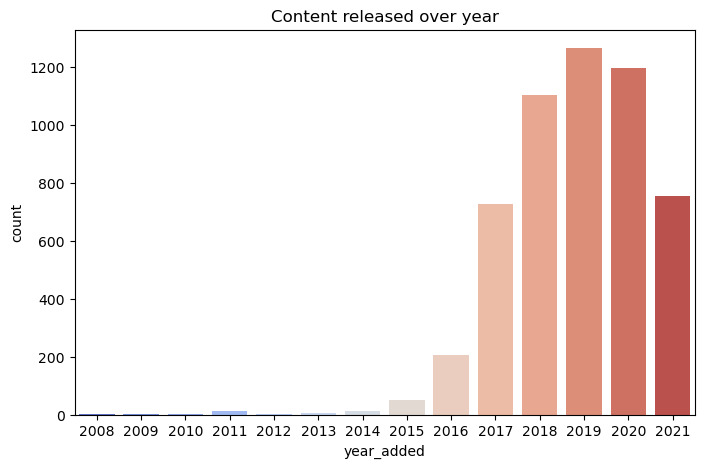

In [134]:
plt.figure(figsize=(8,5))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title("Content released over year")
plt.show()

In [112]:
data['country'].value_counts().head(10)

country
United States     1849
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

In [110]:
top_10_country = data['country'].value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/1082547634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_country,palette='rainbow')


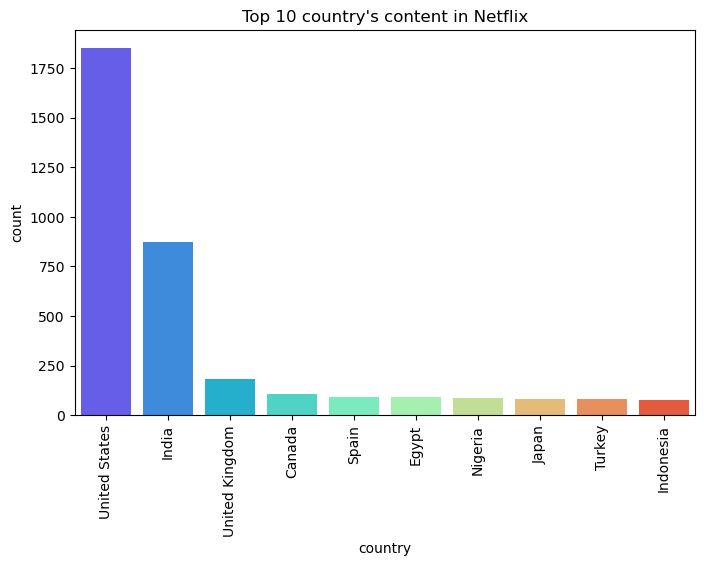

In [132]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_country,palette='rainbow')
plt.title("Top 10 country's content in Netflix")
plt.xticks(rotation=90)
plt.show()

In [139]:
year_counts = data['year_added'].value_counts().sort_index()

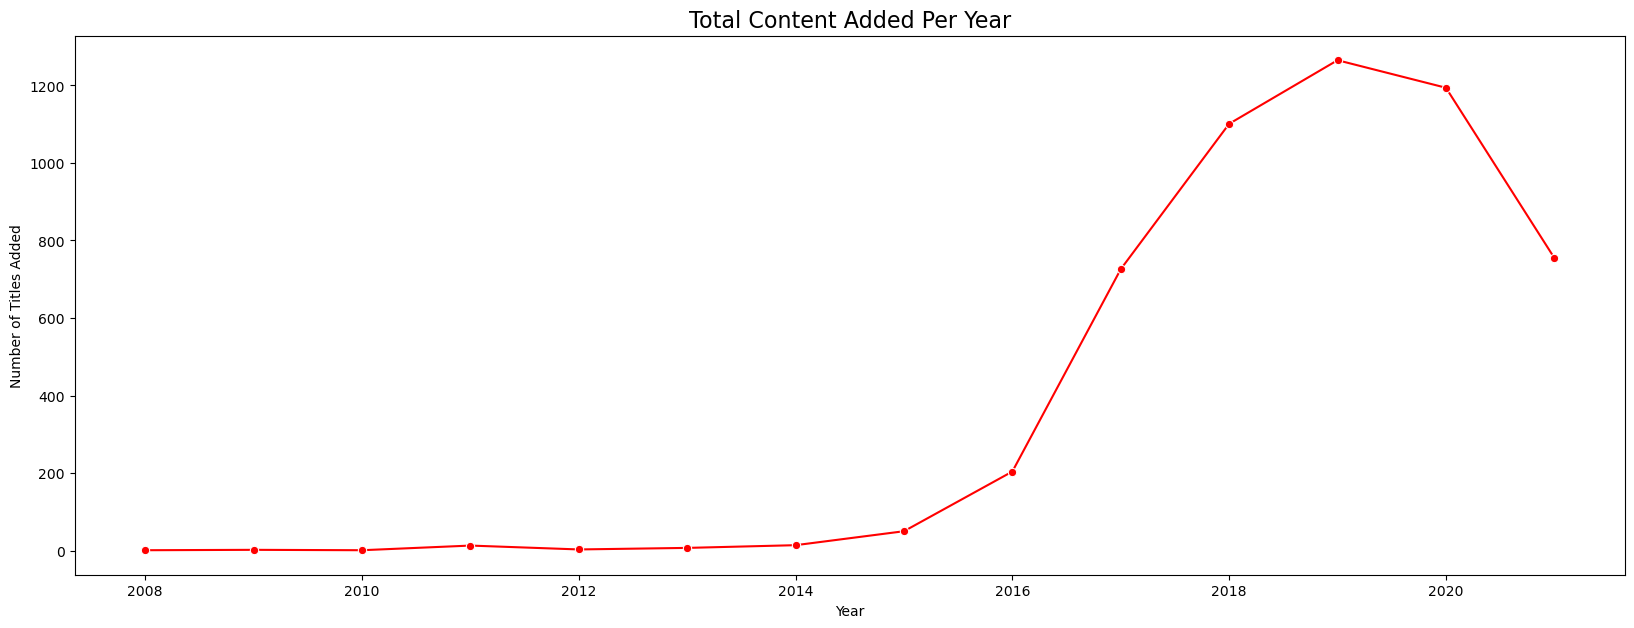

In [146]:
plt.figure(figsize=(20, 7))

year_counts = data['year_added'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o',color='r')
plt.title('Total Content Added Per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

## User Demographics & Targeting

In [106]:
top_10_rating = data['rating'].value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/3283740672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_rating,palette='magma')


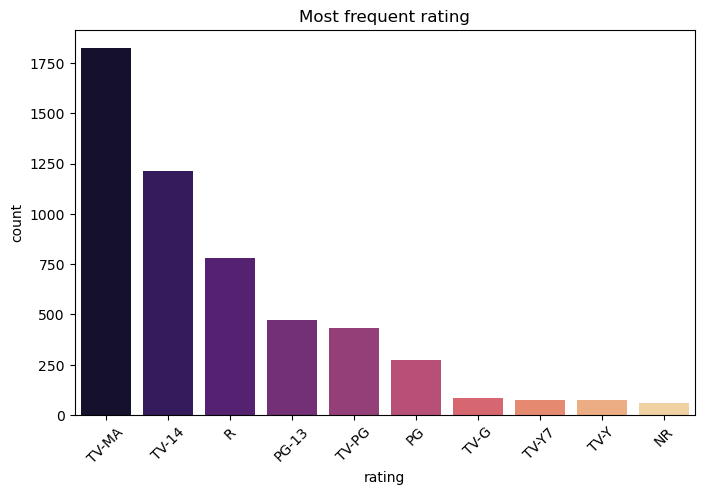

In [147]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_rating,palette='magma')
plt.title("Most frequent rating")
plt.xticks(rotation=45)
plt.show()

In [156]:
mature_content = data[data['rating'] == 'TV-MA']

In [158]:
mature_countries = mature_content['country'].str.split(', ').explode()

In [159]:
top_mature_countries = mature_countries.value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/592894383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_mature_countries, palette='rocket')


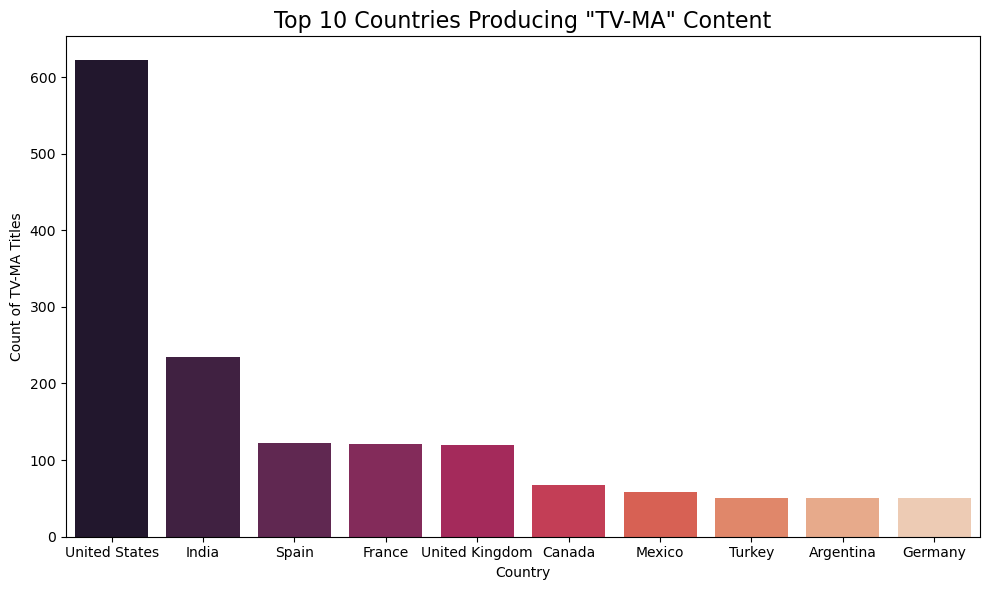

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(top_mature_countries, palette='rocket')
plt.title('Top 10 Countries Producing "TV-MA" Content', fontsize=16)
plt.ylabel('Count of TV-MA Titles')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [172]:
movies = data[data['type'] == 'Movie']
show = data[data['type'] == 'TV Show']

In [192]:
movie_genres = movies['genres'].explode()
top_10_movie_genres = movie_genres.value_counts().head(10)
show_genres = show['genres'].explode()
top_10_show_genres = show_genres.value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/4202424965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_movie_genres, palette='Blues_r')
/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/4202424965.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_show_genres, palette='Oranges_r')


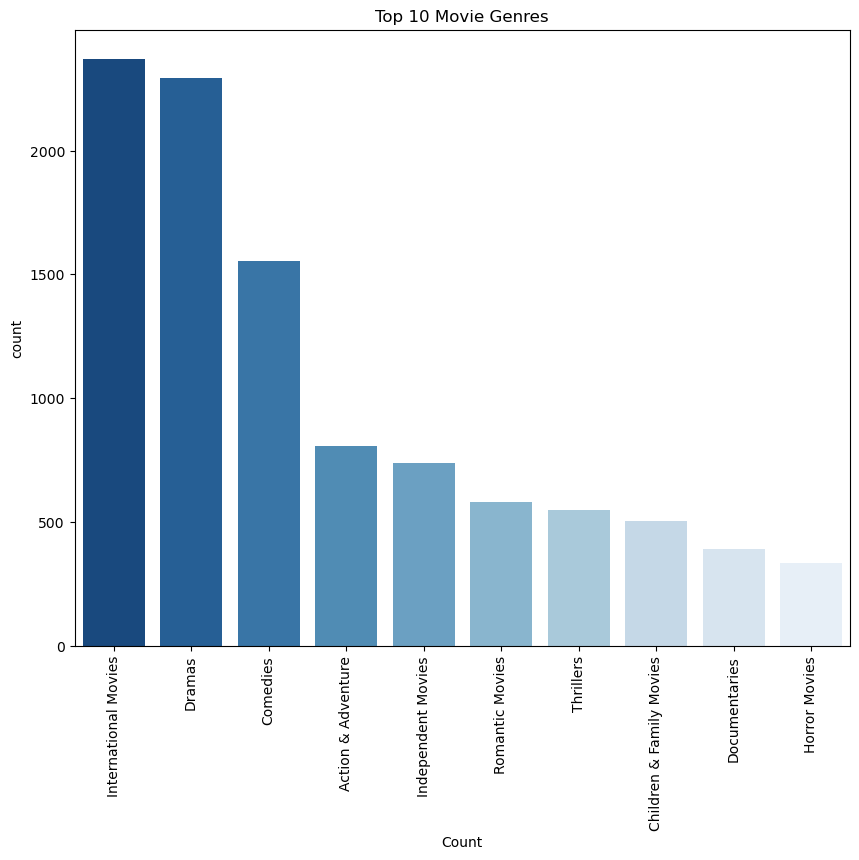

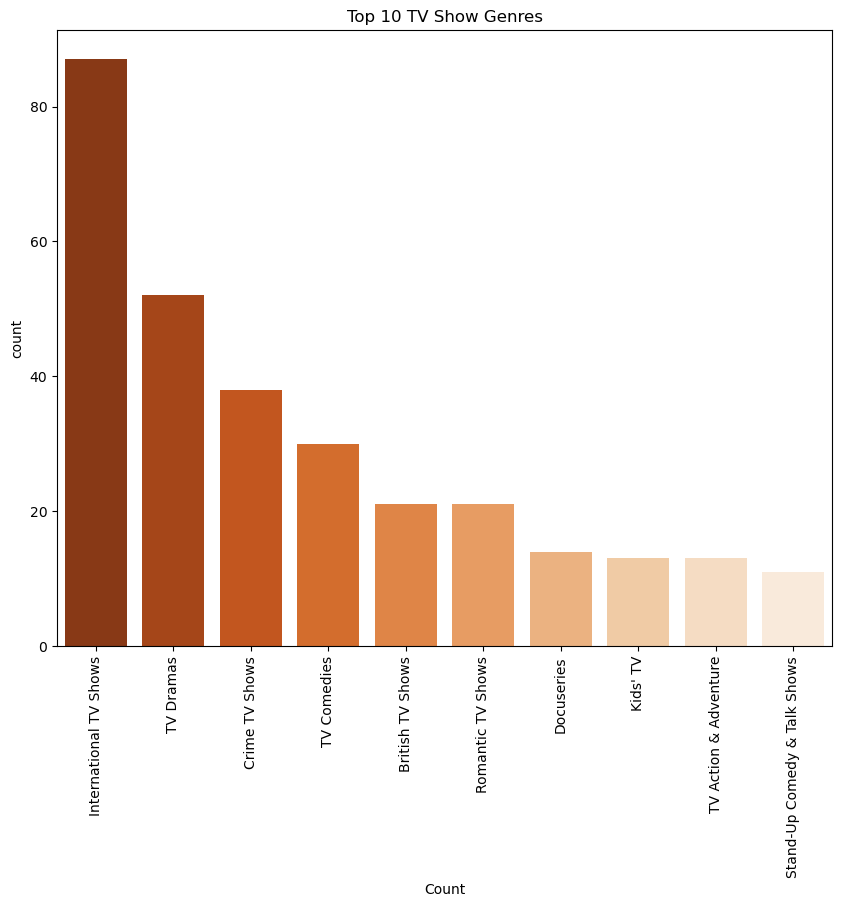

In [193]:
plt.figure(figsize=(10, 8))
sns.barplot(top_10_movie_genres, palette='Blues_r')
plt.title('Top 10 Movie Genres', fontsize=12)
plt.xlabel('Count')
plt.xticks(rotation=90)


plt.figure(figsize=(10, 8))
sns.barplot(top_10_show_genres, palette='Oranges_r')
plt.title('Top 10 TV Show Genres', fontsize=12)
plt.xlabel('Count')
plt.xticks(rotation=90)


plt.show()

In [199]:
us_data = data[data['country'].str.contains('United States')]
other_country_data = data[~data['country'].str.contains('United States')]

In [209]:
us_genres = us_data['genres'].explode().value_counts().head(10)
other_genres = other_country_data['genres'].explode().value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/2199287004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(us_genres, palette='cividis')
/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/2199287004.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(other_genres, palette='magma')


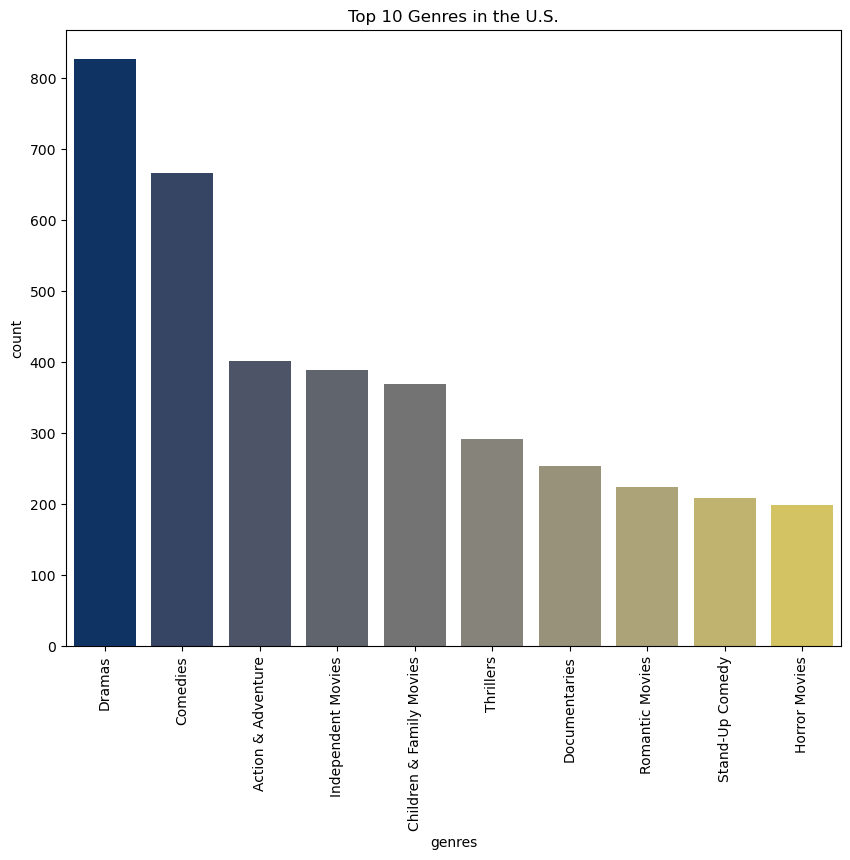

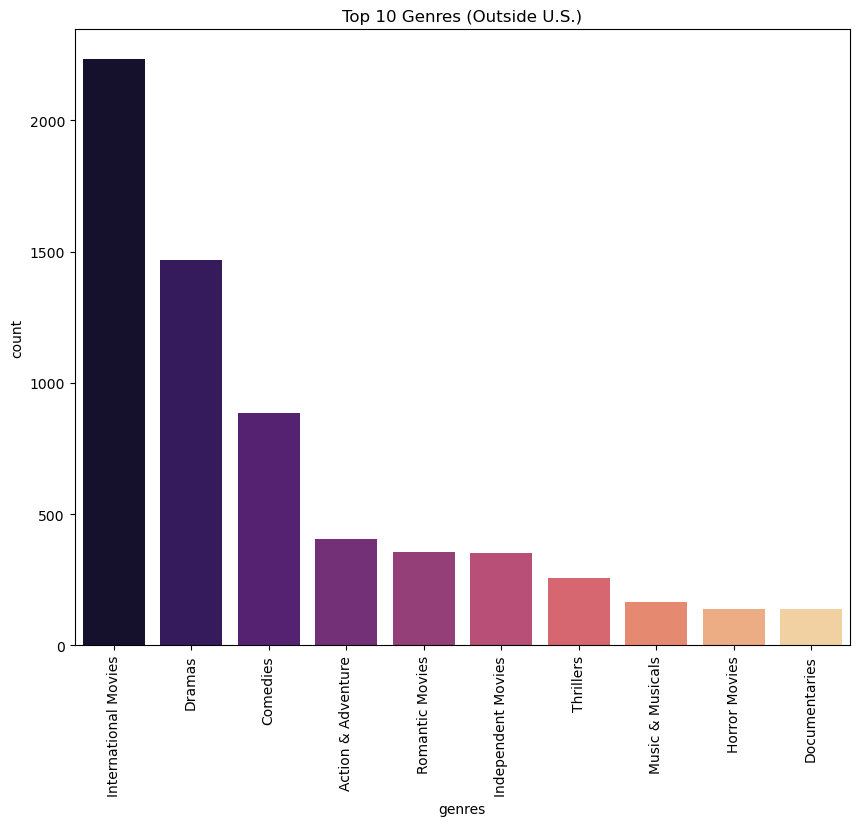

In [211]:
plt.figure(figsize=(10, 8))
sns.barplot(us_genres, palette='cividis')
plt.title('Top 10 Genres in the U.S.')
plt.xticks(rotation=90)

plt.figure(figsize=(10, 8))
sns.barplot(other_genres, palette='magma')
plt.title('Top 10 Genres (Outside U.S.)')
plt.xticks(rotation=90)
plt.show()

In [213]:
ly = data['year_added'].max()
last3year_data = data[data['year_added'] >= (ly-2)]

In [214]:
genres_last3years = last3year_data['genres'].explode().value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/4269155871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(genres_last3years, palette='plasma')


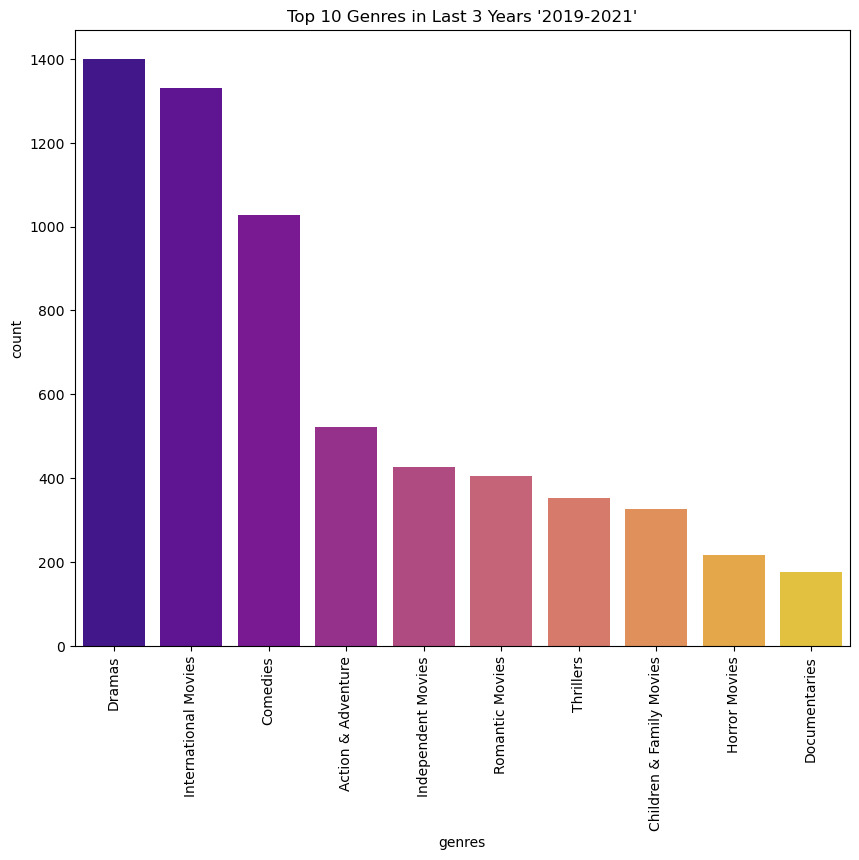

In [217]:
plt.figure(figsize=(10,8))
sns.barplot(genres_last3years, palette='plasma')
plt.title(f"Top 10 Genres in Last 3 Years '{int(ly-2)}-{ly}'")
plt.xticks(rotation=90)
plt.show()

## Talent Acquisition & Partnerships

In [86]:
top_director = data['director'].value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/153428102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_director,palette='viridis')


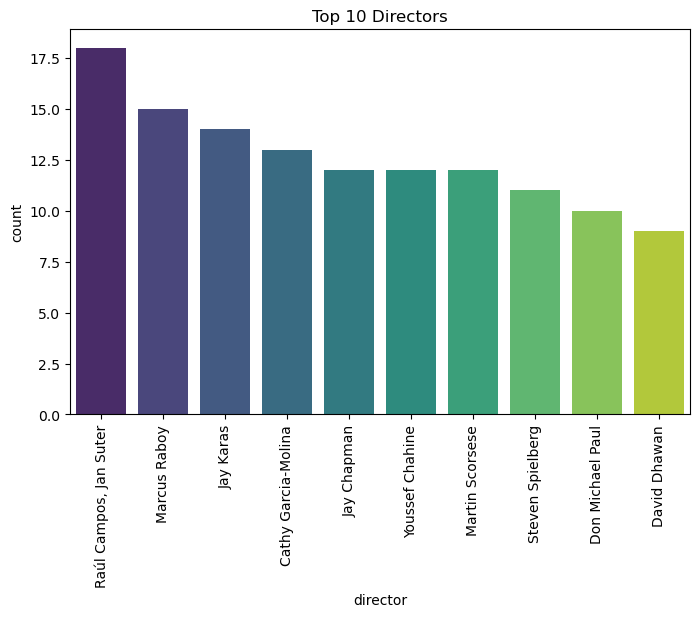

In [148]:
plt.figure(figsize=(8,5))
sns.barplot(top_director,palette='viridis')
plt.title("Top 10 Directors")
plt.xticks(rotation=90)
plt.show()

In [221]:
all_cast = data['cast'].str.split(', ').explode()
top_10_actor = all_cast.value_counts().head(10)

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/2733191044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_actor,palette='cubehelix')


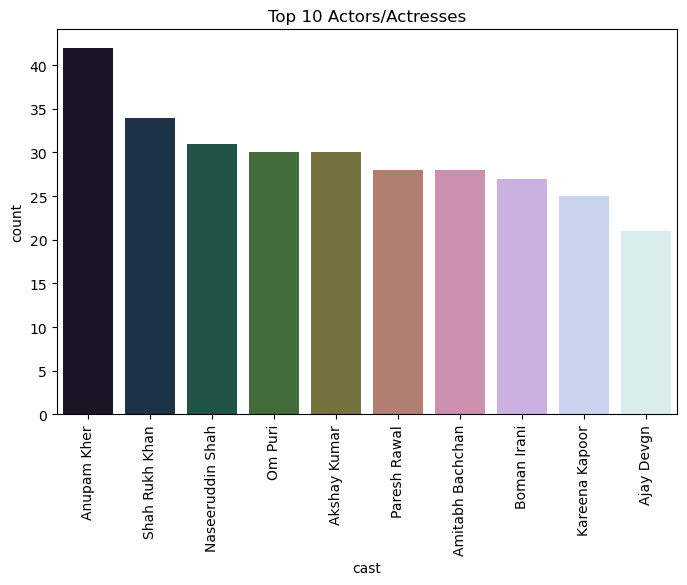

In [222]:
plt.figure(figsize=(8,5))
sns.barplot(top_10_actor,palette='cubehelix')
plt.title("Top 10 Actors/Actresses")
plt.xticks(rotation=90)
plt.show()

In [231]:
direct_genre = data[['director','genres']]
direct_genre = direct_genre.assign(genres=direct_genre['genres']).explode('genres')
direct_genre = direct_genre.assign(director=direct_genre['director'].str.split(', ')).explode('director')

In [248]:
direct_genre.groupby(['director', 'genres']).size().nlargest(10).reset_index(name='count')

,director,genres,count
0,Jan Suter,Stand-Up Comedy,21
1,Raúl Campos,Stand-Up Comedy,19
2,Jay Karas,Stand-Up Comedy,14
3,Marcus Raboy,Stand-Up Comedy,14
4,Cathy Garcia-Molina,International Movies,13
5,Jay Chapman,Stand-Up Comedy,12
6,Youssef Chahine,Dramas,12
7,Youssef Chahine,International Movies,10
8,Cathy Garcia-Molina,Dramas,9
9,David Dhawan,Comedies,9


In [237]:
pair_counts = direct_genre.groupby(['director', 'genres']).size().nlargest(10)
pair_counts_df = pair_counts.reset_index(name='count')
pair_counts_df['pair']=pair_counts_df['director'] + " - " + pair_counts_df['genres']

In [243]:
pair_counts_df

,director,genres,count,pair
0,Jan Suter,Stand-Up Comedy,21,Jan Suter - Stand-Up Comedy
1,Raúl Campos,Stand-Up Comedy,19,Raúl Campos - Stand-Up Comedy
2,Jay Karas,Stand-Up Comedy,14,Jay Karas - Stand-Up Comedy
3,Marcus Raboy,Stand-Up Comedy,14,Marcus Raboy - Stand-Up Comedy
4,Cathy Garcia-Molina,International Movies,13,Cathy Garcia-Molina - International Movies
5,Jay Chapman,Stand-Up Comedy,12,Jay Chapman - Stand-Up Comedy
6,Youssef Chahine,Dramas,12,Youssef Chahine - Dramas
7,Youssef Chahine,International Movies,10,Youssef Chahine - International Movies
8,Cathy Garcia-Molina,Dramas,9,Cathy Garcia-Molina - Dramas
9,David Dhawan,Comedies,9,David Dhawan - Comedies


/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/2565140505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pair_counts_df, x='count', y='pair', palette='cubehelix')


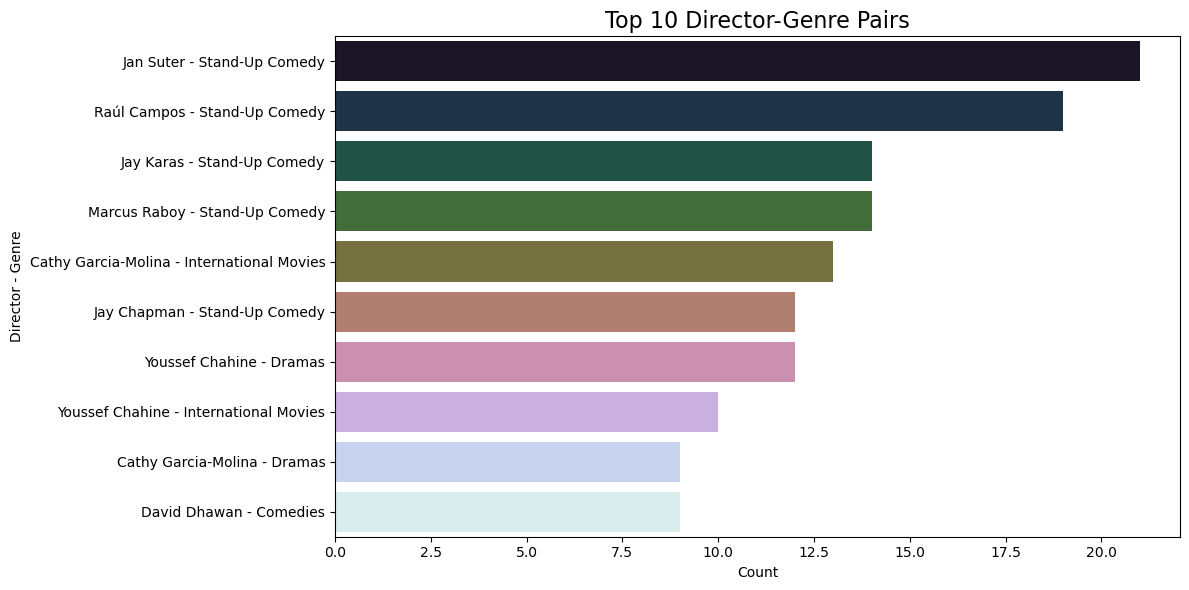

In [251]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pair_counts_df, x='count', y='pair', palette='cubehelix')
plt.title('Top 10 Director-Genre Pairs', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Director - Genre')
plt.tight_layout()
plt.show()

## Duration & Engagement

In [264]:
Movie_durations = data[data['type'] == 'Movie']['duration']
Avg_time = Movie_durations.str.split(" ").str[0].astype(int).mean()
print(f"The average duration of movies on Netflix is {Avg_time:.2f} minutes.")

The average duration of movies on Netflix is 102.70 minutes.


In [275]:
Show_durations = data[data['type'] == 'TV Show']['duration']
Avg_time = Show_durations.str.split(" ").str[0].astype(int).mean()
print(f"The average duration of TV shows on Netflix is {Avg_time:.1f} seasons.")

The average duration of TV shows on Netflix is 1.9 seasons.


In [312]:
movies = data[(data['type'] == 'Movie') & (data['release_year'] >= 1980)]
movies['duration'] = movies['duration'].str.split(" ").str[0].astype(int)
avg_duration_by_year = movies.groupby('release_year')['duration'].mean()

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/3266459499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.split(" ").str[0].astype(int)


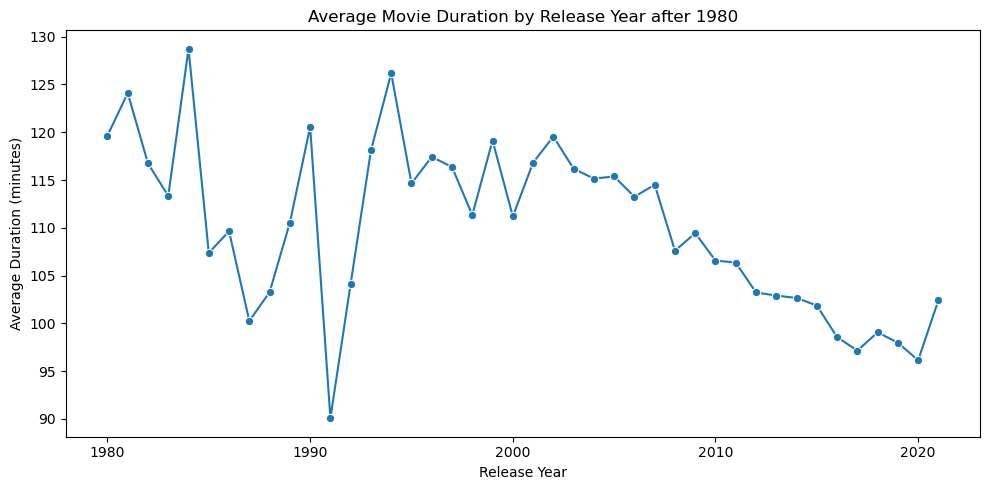

In [316]:
plt.figure(figsize=(10, 5))
sns.lineplot(avg_duration_by_year, marker='o')
plt.title('Average Movie Duration by Release Year after 1980')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()
plt.show()

## Content Launch Strategy

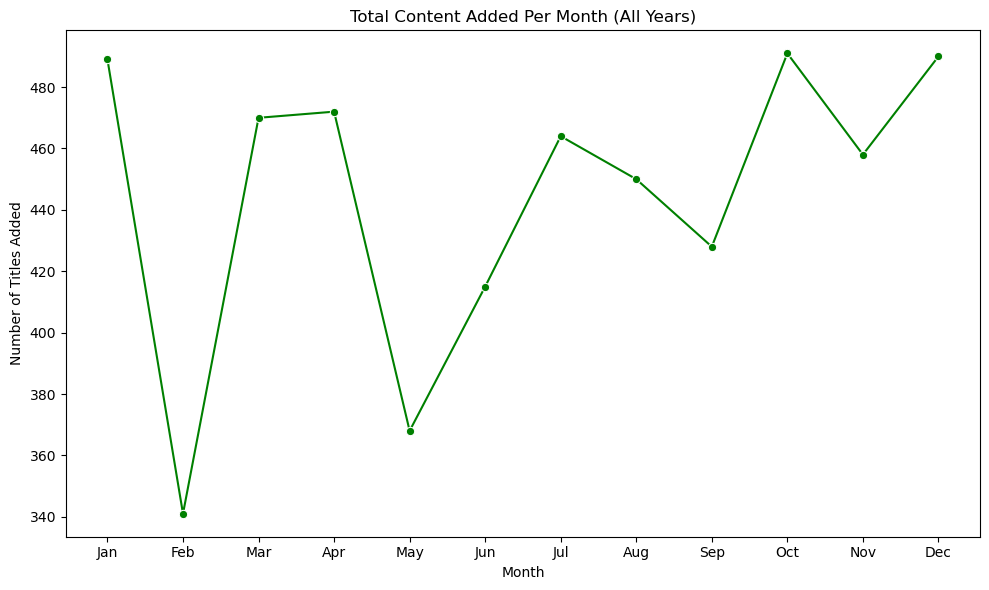

In [318]:
month_counts = data['month_added'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o',color='g')
plt.title('Total Content Added Per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=range(1, 13), labels=month_labels)

plt.tight_layout()
plt.show()

In [339]:
genre_year_df = data.assign(genre=data['listed_in'].str.split(', ')).explode('genre')

top_5_genres = genre_year_df['genre'].value_counts().head(5).index.tolist()

genre_year_top5 = genre_year_df[genre_year_df['genre'].isin(top_5_genres)]

genre_year_top5 = genre_year_top5[genre_year_top5['year_added'] >= 2015]

genre_trends = genre_year_top5.groupby(['year_added', 'genre']).size().unstack().fillna(0)

<Figure size 1200x800 with 0 Axes>

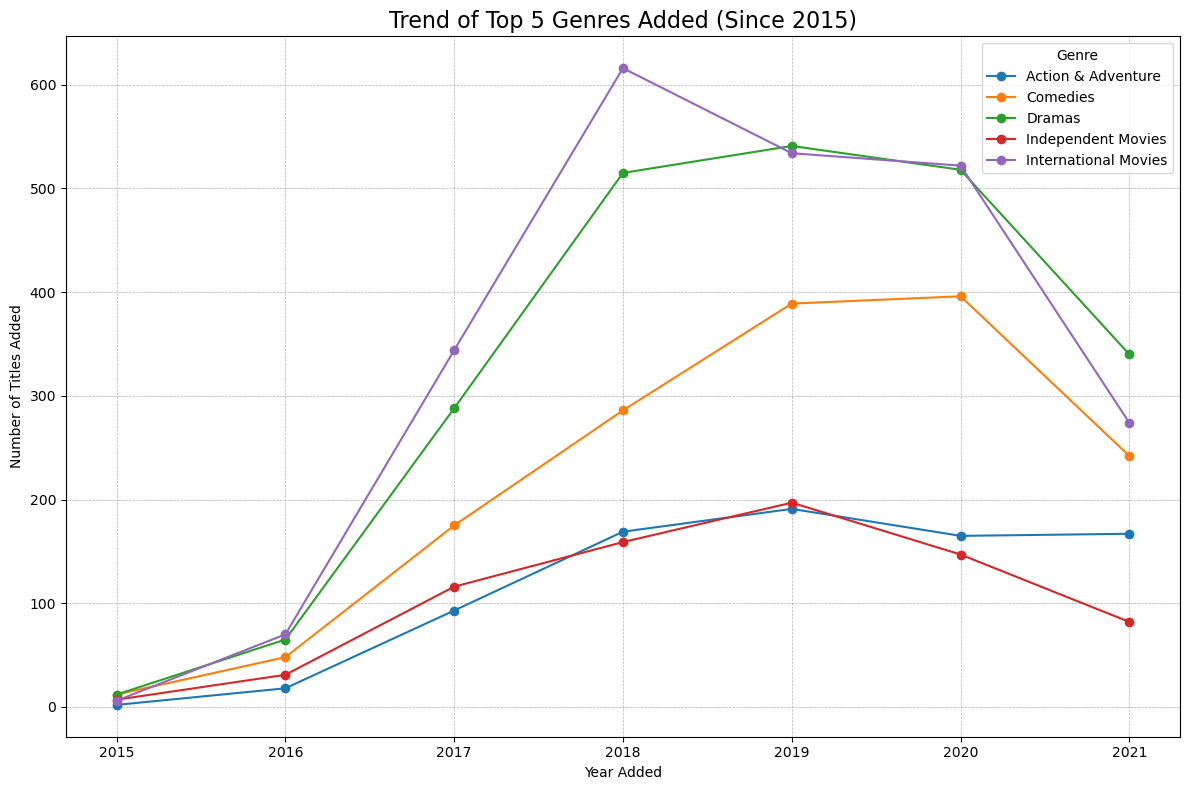

In [341]:
plt.figure(figsize=(12, 8))
genre_trends.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Trend of Top 5 Genres Added (Since 2015)', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Genre')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [342]:
data['genres'].value_counts().head(10)

genres
[Dramas, International Movies]                        336
[Stand-Up Comedy]                                     286
[Comedies, Dramas, International Movies]              257
[Dramas, Independent Movies, International Movies]    243
[Children & Family Movies, Comedies]                  179
[Dramas, International Movies, Romantic Movies]       160
[Documentaries]                                       156
[Comedies, International Movies]                      152
[Comedies, International Movies, Romantic Movies]     143
[Dramas]                                              134
Name: count, dtype: int64

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


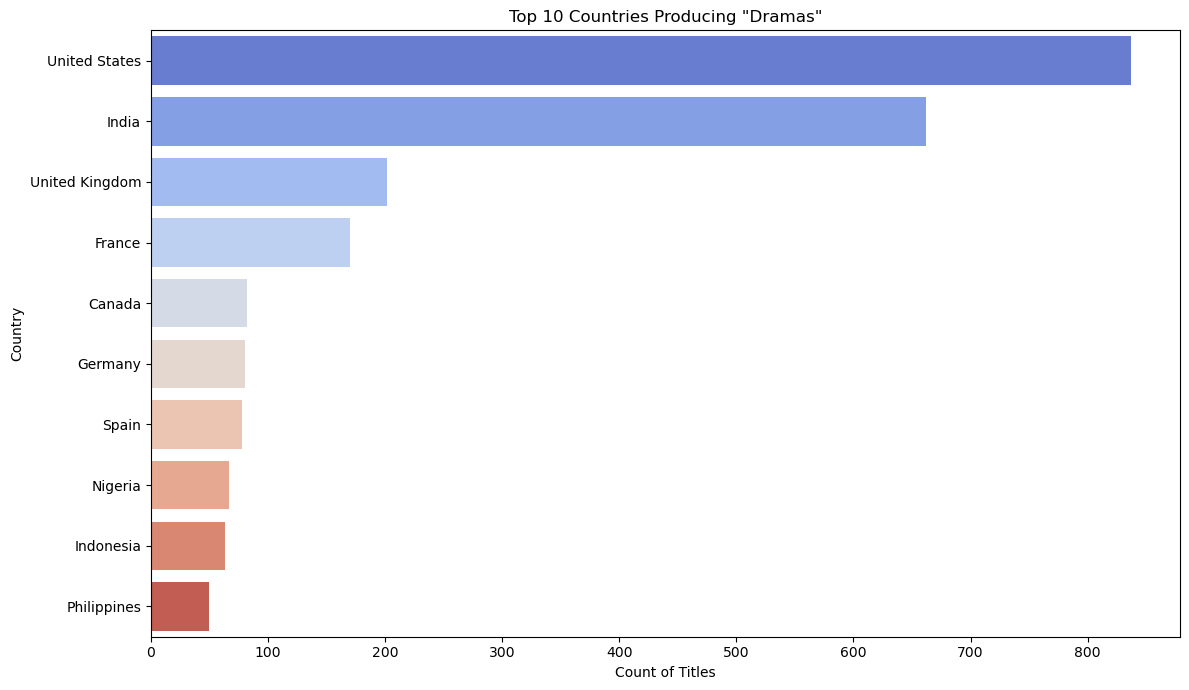

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


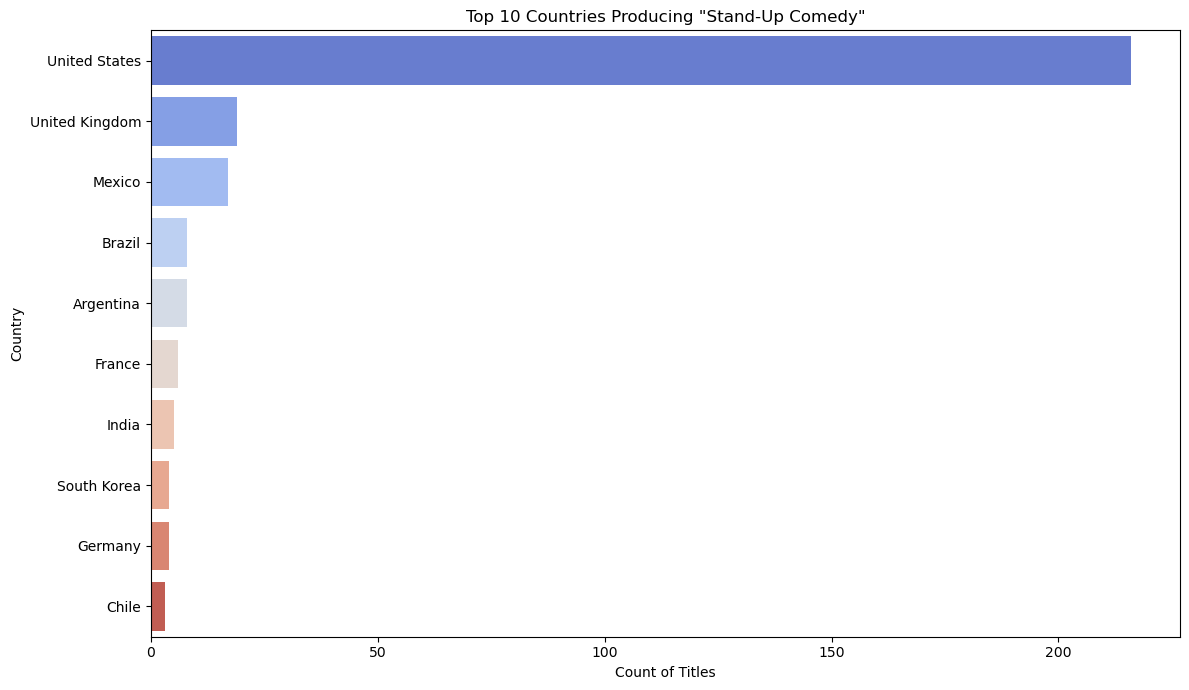

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


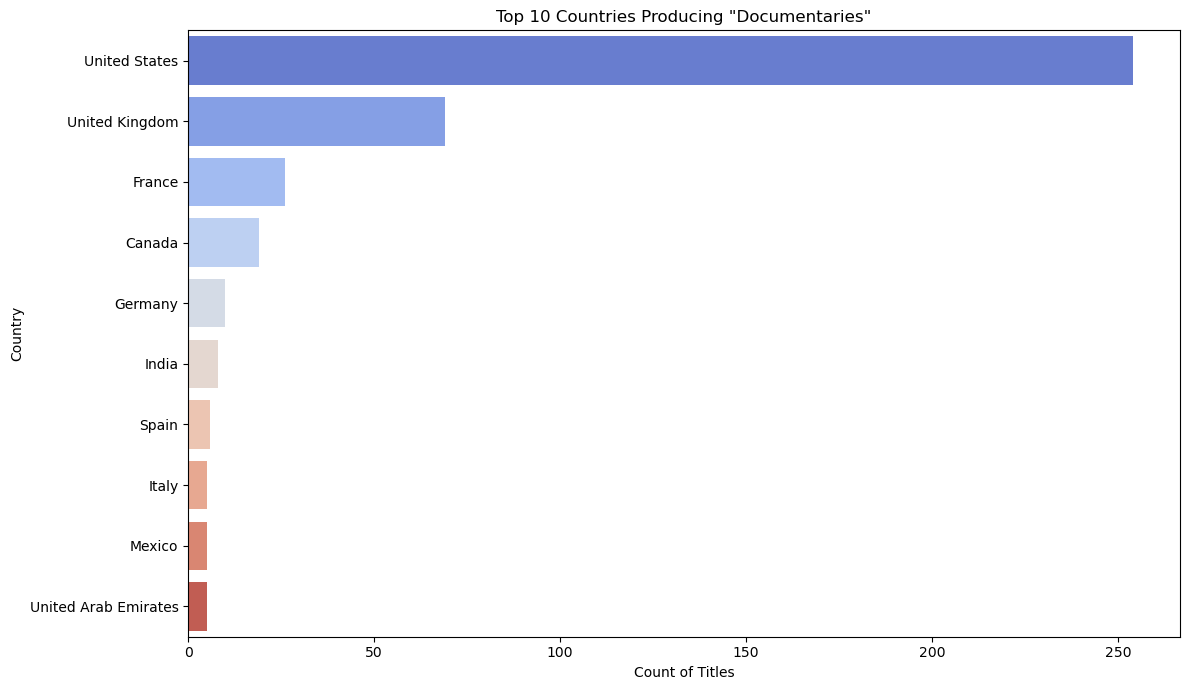

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


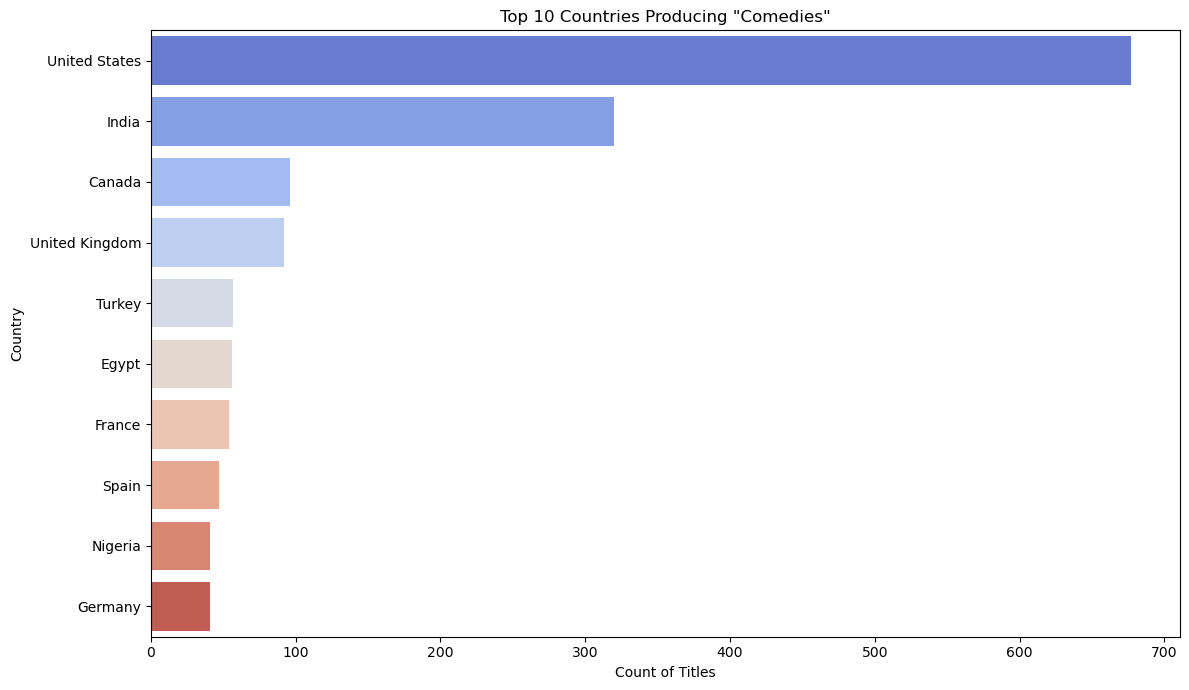

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


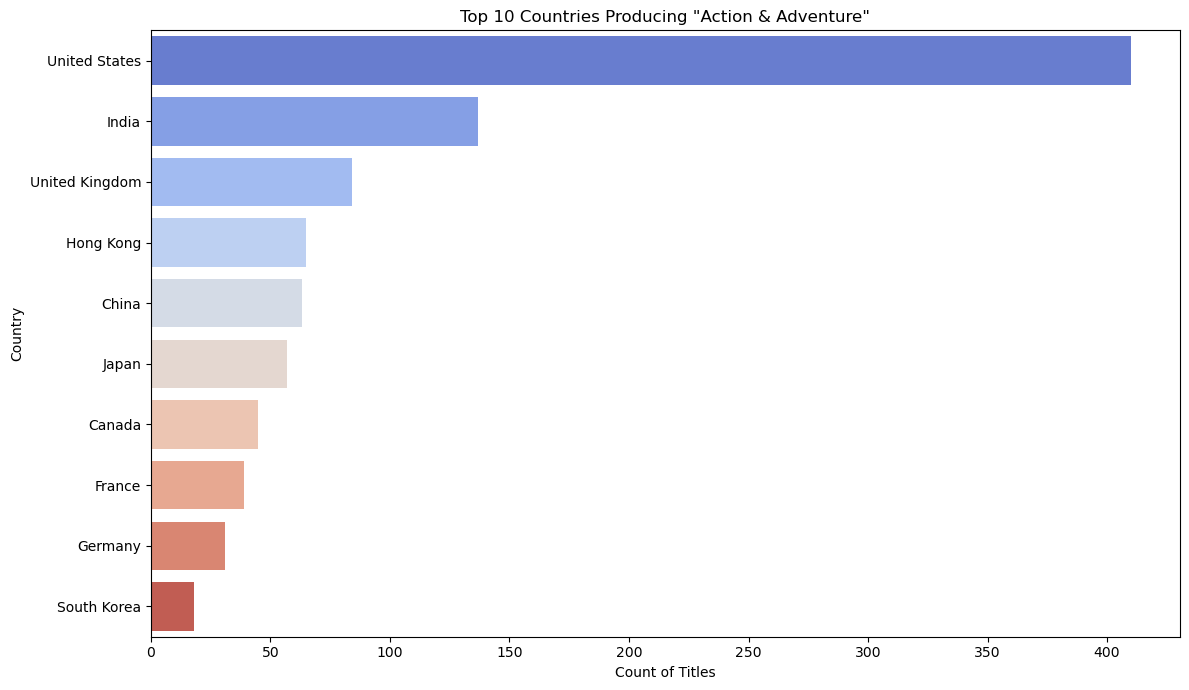

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


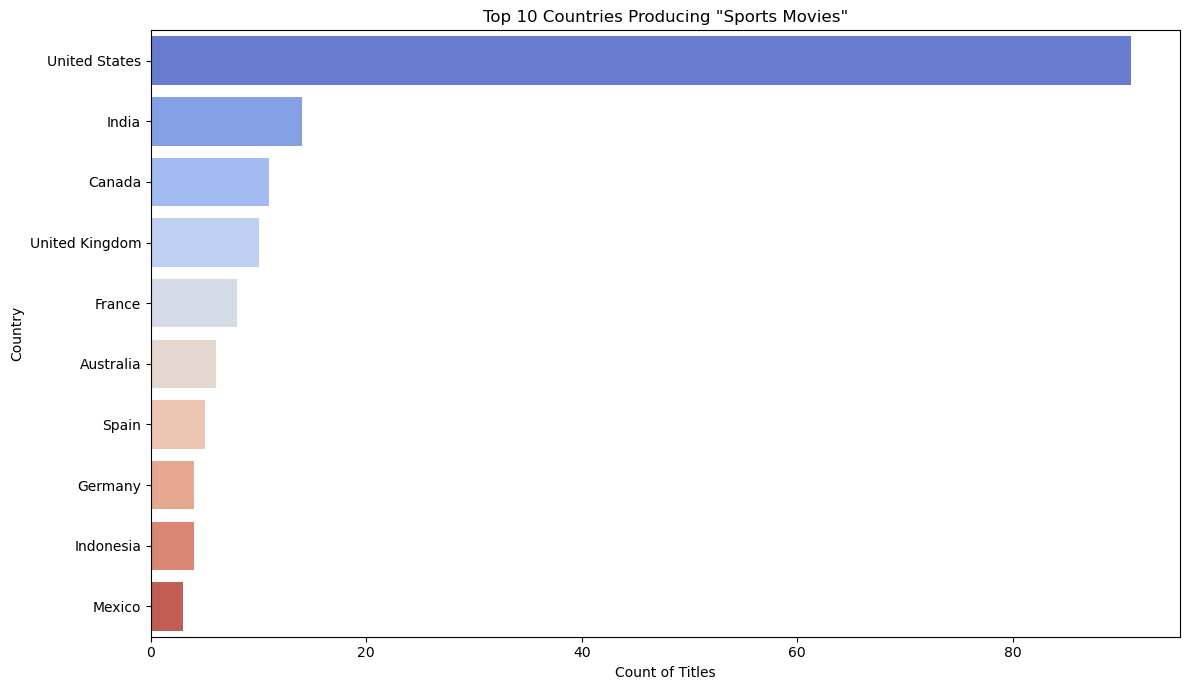

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


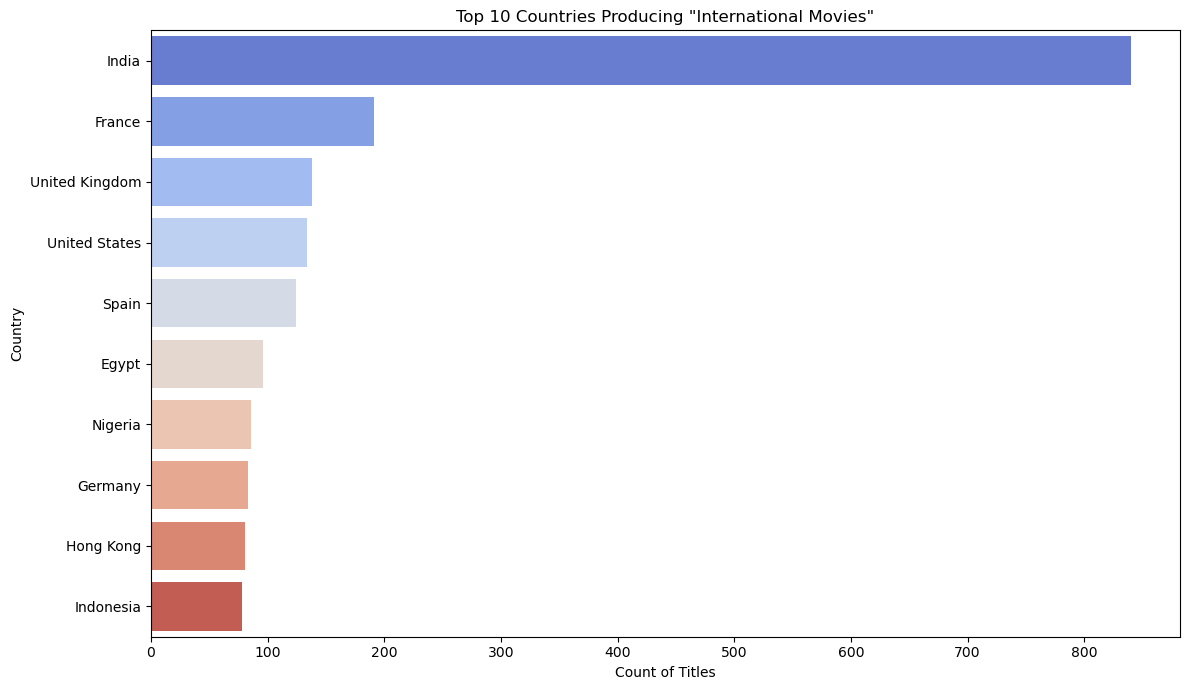

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


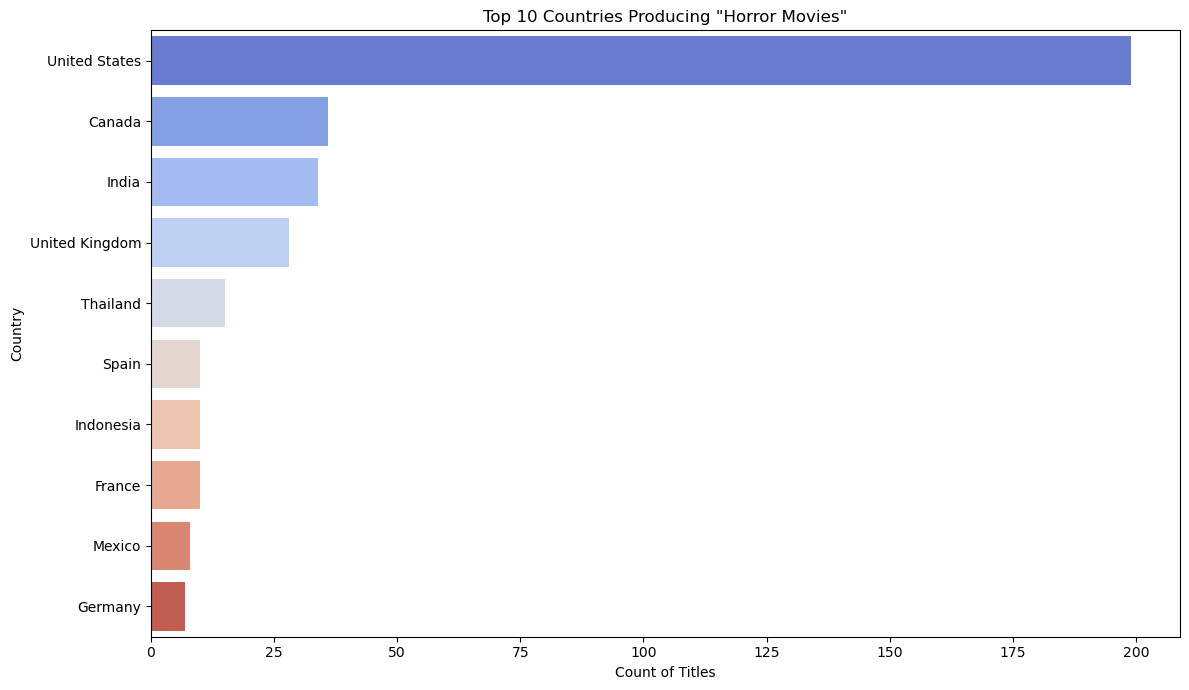

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


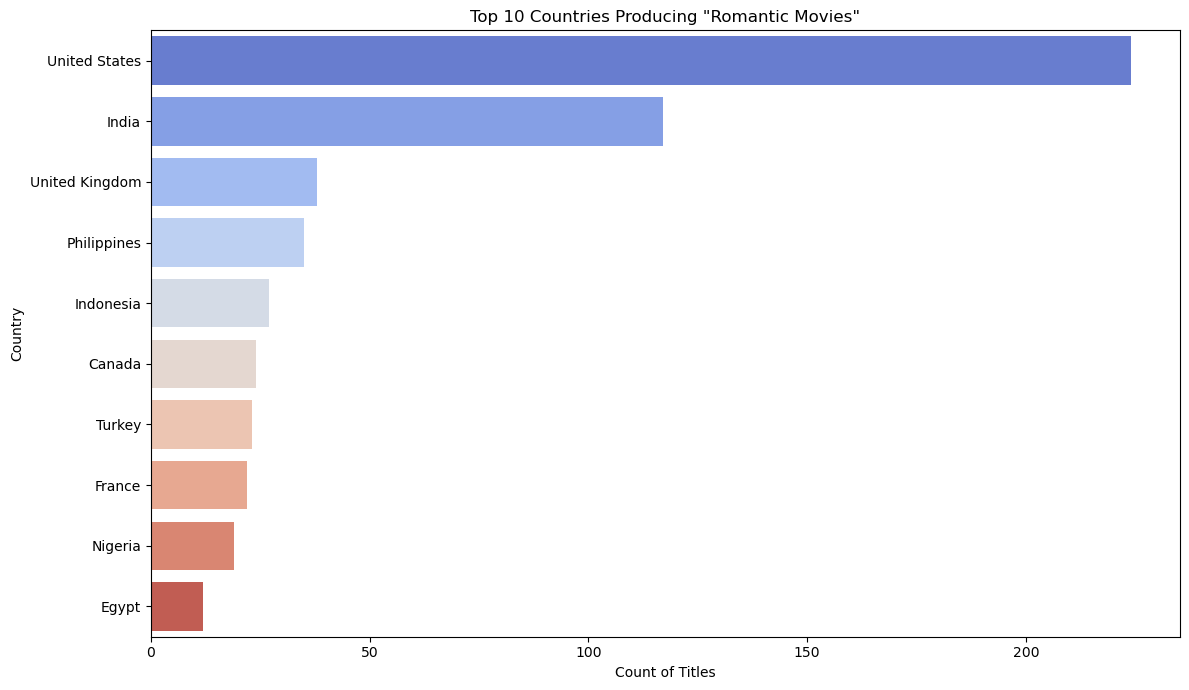

/var/folders/v1/vk_cs_rd5mg9d6dw2hntnlr00000gn/T/ipykernel_18960/100379886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


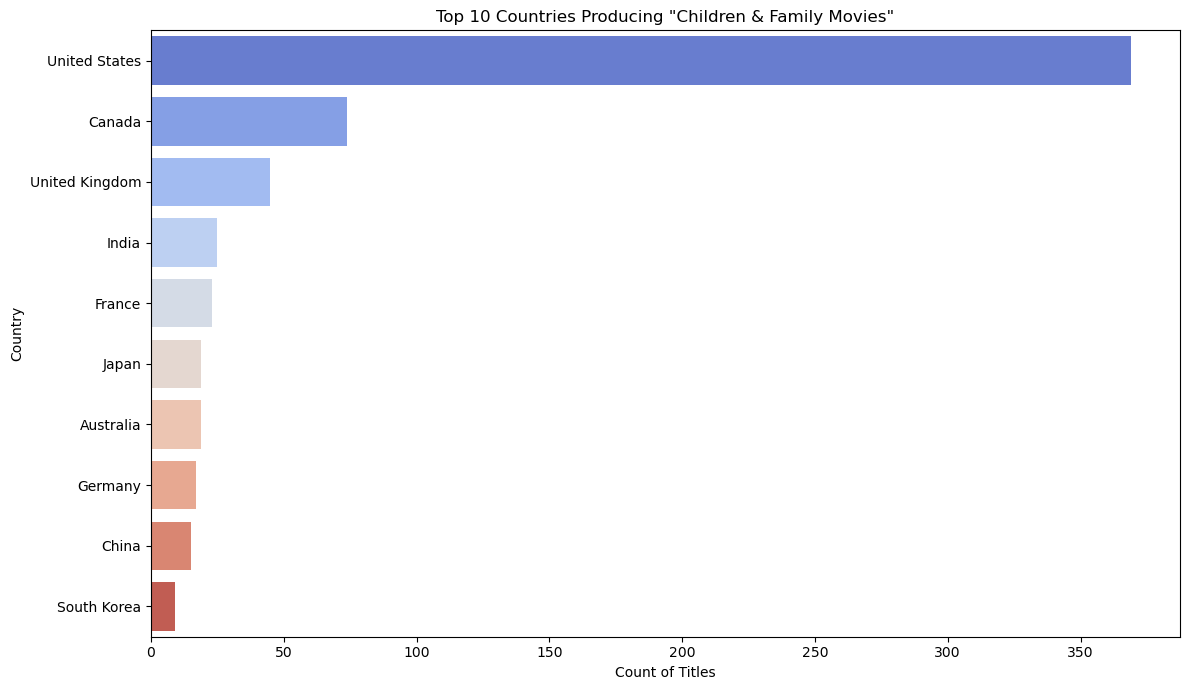

In [344]:
genre_to_check = ['Dramas','Stand-Up Comedy','Documentaries','Comedies','Action & Adventure','Sports Movies','International Movies','Horror Movies','Romantic Movies','Children & Family Movies']
for i in genre_to_check:
    df = data[data['listed_in'].str.contains(i)]
    countries = df['country'].str.split(', ').explode()
    top_countries = countries.value_counts().head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
    plt.title(f'Top 10 Countries Producing "{i}"')
    plt.xlabel('Count of Titles')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

# Word Cloud

In [89]:
movie_titles = data[data['type'] == 'Movie']['title']

In [102]:
wordcloud = WordCloud(width=1400, height=900).generate(" ".join(movie_titles))

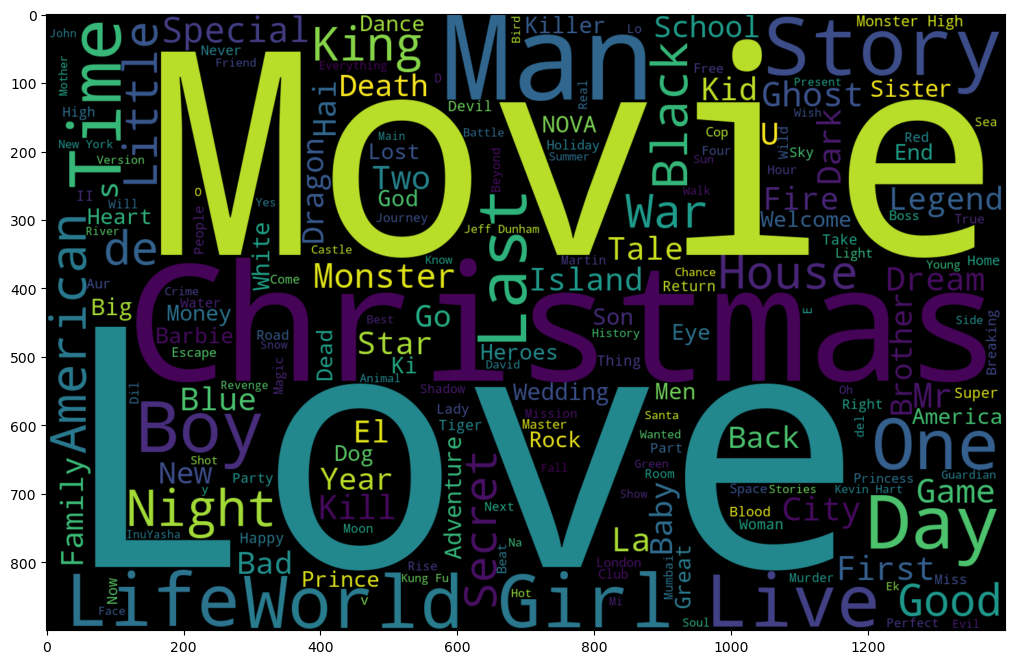

In [121]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()